## Random Forest Regression

* A **Random Forest Regressor** predicts the target by combining the outputs of **multiple Decision Trees**.
* Each tree is trained on a **random subset of the data (bootstrapping)** and with **random feature selection**.
* The final prediction is the **average of predictions from all trees**.

### Formula (Conceptual):

For a Random Forest with **$T$ trees**, the prediction is:

$$
\hat{y}(x) = \frac{1}{T} \sum_{t=1}^{T} \hat{y}^{(t)}(x)
$$

Where:

* **$T$** → Total number of decision trees in the forest
* **$\hat{y}^{(t)}(x)$** → Prediction from the $t$-th decision tree
* Final result = **mean prediction across all trees**


### Explanation:

* Each tree is trained on a **random sample of data** and possibly a **subset of features**.
* Trees may overfit individually, but averaging them **reduces variance** and improves generalization.
* Unlike a single Decision Tree, Random Forest gives **smoother and more stable predictions**.


### What it means:

* Instead of one staircase-like function (Decision Tree), Random Forest combines **many staircases** to produce a **more continuous curve**.
* Great at capturing **non-linear patterns** without heavy overfitting.
* Works well when data has noise.


### Example: Position vs Salary (Non-linear Growth)

Suppose Salary jumps at career levels, but with some randomness. Random Forest smooths these jumps.

| Level (x) | Actual Salary (Y) | Decision Tree Predicted | Random Forest Predicted |
| --------- | ----------------- | ----------------------- | ----------------------- |
| 1         | 45k               | 45k                     | 44.8k                   |
| 3         | 60k               | 60k                     | 59.5k                   |
| 6         | 150k              | 150k                    | 149k                    |
| 10        | 1M                | 1M                      | 995k                    |

Notice how Random Forest **smooths predictions** while still fitting training points closely.

---

### Solve:

* You are given a [Position_Salaries.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Position_Salaries.csv) containing:

  * **Position** (string, e.g., "Business Analyst", "CEO")
  * **Level** (numeric, 1–10)
  * **Salary** (numeric, target variable)

* Build a **Random Forest Regression model** to predict Salary from Level.

* Tasks:

  * Load and explore the dataset.
  * Select `Level` as the independent variable and `Salary` as the dependent variable.
  * Train a **Random Forest Regressor** (`RandomForestRegressor` from sklearn).
  * Plot predictions vs actual salaries.



In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data-set
dataset = pd.read_csv("/kaggle/input/data-csv/Position_Salaries.csv")
independent_x = dataset.iloc[:, 1:-1].values
dependent_y = dataset.iloc[:, -1].values 
dependent_y = dependent_y.reshape(len(dependent_y), 1)
independent_x, dependent_y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]))

In [3]:
# train 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, n_estimators=10)
regressor.fit(independent_x, dependent_y)

/tmp/ipykernel_13/4021757955.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(independent_x, dependent_y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [4]:
# predict
regressor.predict([[6.5]])

array([167000.])

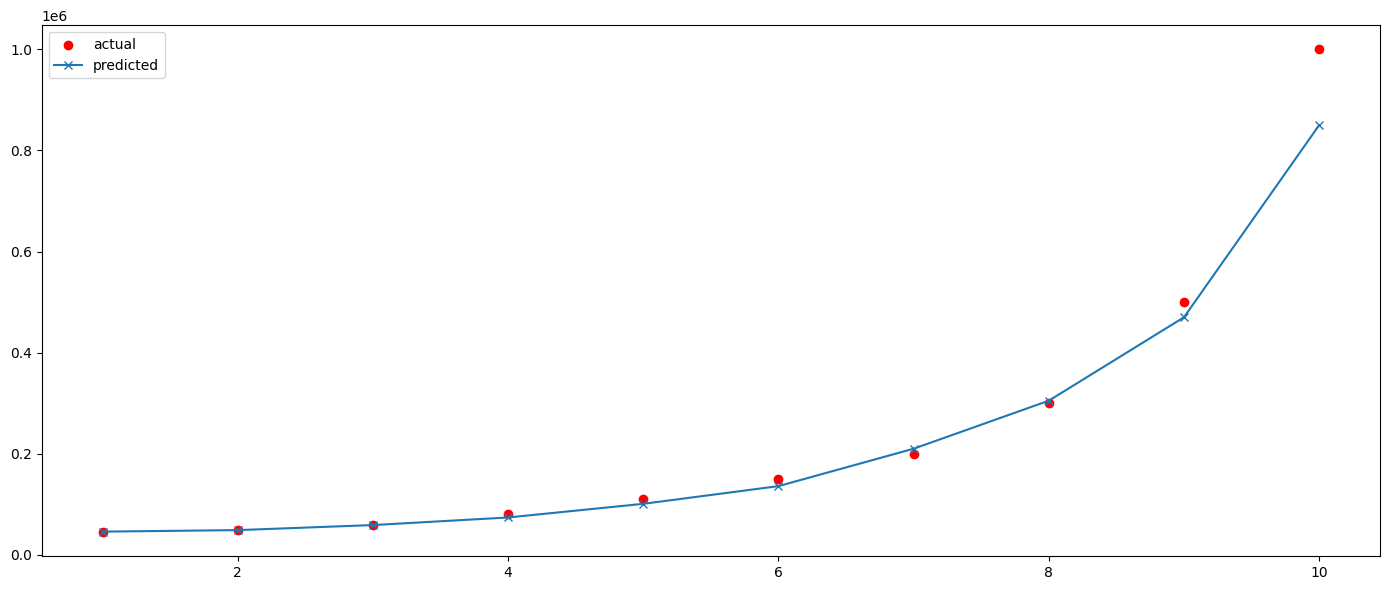

In [5]:
# plot
plt.figure(figsize=(14, 6))
plt.scatter(independent_x, dependent_y, color="red", label="actual")
plt.plot(independent_x, regressor.predict(independent_x), label="predicted", marker="x")
plt.legend()
plt.tight_layout()
plt.show()